---
<a name='title'></a>
# **<font color="#8397df"> Modelación Climática Tropical </font>**
### **<font color="#e7a4d7"> Precipitación Climatológica en GPCP </font>**


---

In [1]:
pip install xarray

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cftime

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install h5netcdf

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install cartopy

Note: you may need to restart the kernel to use updated packages.


In [5]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt
import pandas as pd
import cartopy.crs as ccrs
import cartopy.feature as cfeature #capas preestablecidas
from cartopy.util import add_cyclic_point
from matplotlib import colors
from matplotlib.ticker import PercentFormatter
import seaborn as sns

In [6]:
def lineplot_setup(xmin,xmax,xlab,ylab,ymin=None,ymax=None,title=None,legend=False):
    plt.xlim([xmin,xmax])
    plt.ylim([ymin,ymax])
    plt.grid(linestyle='--',alpha=0.66)
    plt.minorticks_on()
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xlabel(xlab,fontsize=14)
    plt.ylabel(ylab,fontsize=14)
    plt.title(title,fontsize=15)
    if legend:
        plt.legend(fancybox=True,shadow=True,fontsize=12.5)

In [7]:
def mapa_MC(data,levels,ccmap,titulo,extend='both',cbarlabel='pr  [mm día$^{-1}$]',limite_NS=75):
    lons,lats=data.lon,data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(10, 7))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    cs=ax.contourf(lon,lats,data,levels=levels,cmap=ccmap,extend=extend,transform=ccrs.PlateCarree())
    ax.set_extent([0,359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())
    gl=ax.gridlines(draw_labels=True,color='gray', alpha=0.5, linestyle='--')
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo,fontsize=12)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar=plt.colorbar(cs,orientation='horizontal',fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [8]:
# Archivo de precipitación GPCP
filename='/home/jovyan/ModClim/datos_actualizados/precip.mon.mean.nc'
ds=xr.open_dataset(filename)
pr=ds['precip']
pr

<xarray.DataArray 'precip' (time: 555, lat: 72, lon: 144)> Size: 23MB
[5754240 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-03-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:                Average Monthly Rate of Precipitation
    valid_range:              [  0. 100.]
    units:                    mm/day
    precision:                32767
    least_significant_digit:  2
    var_desc:                 Precipitation
    dataset:                  GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:               Surface
    statistic:                Mean
    parent_stat:              Mean
    actual_range:             [ 0.       47.327435]

In [9]:
pr.units

'mm/day'

In [10]:
pr.time

<xarray.DataArray 'time' (time: 555)> Size: 4kB
array(['1979-01-01T00:00:00.000000000', '1979-02-01T00:00:00.000000000',
       '1979-03-01T00:00:00.000000000', ..., '2025-01-01T00:00:00.000000000',
       '2025-02-01T00:00:00.000000000', '2025-03-01T00:00:00.000000000'],
      dtype='datetime64[ns]')
Coordinates:
  * time     (time) datetime64[ns] 4kB 1979-01-01 1979-02-01 ... 2025-03-01
Attributes:
    long_name:      Time
    delta_t:        0000-01-00 00:00:00
    avg_period:     0000-01-00 00:00:00
    standard_name:  time
    axis:           T
    actual_range:   [65378. 82239.]

In [11]:
jjas = pr.where((pr.time.dt.month >= 6) & (pr.time.dt.month <= 9), drop=True)
jjas

<xarray.DataArray 'precip' (time: 184, lat: 72, lon: 144)> Size: 8MB
array([[[0.40025383, 0.34795108, 0.34621078, ..., 0.4018895 ,
         0.42617947, 0.4698062 ],
        [0.34051663, 0.3371525 , 0.34920245, ..., 0.34229475,
         0.35928172, 0.38886547],
        [0.35160318, 0.36551303, 0.34649962, ..., 0.39019996,
         0.43633172, 0.4101075 ],
        ...,
        [0.39982226, 0.40422487, 0.40118226, ..., 0.3604558 ,
         0.3675577 , 0.39589337],
        [0.38911846, 0.3938013 , 0.43551448, ..., 0.3819375 ,
         0.3952889 , 0.38754708],
        [0.48018825, 0.48731658, 0.502514  , ..., 0.4427042 ,
         0.494787  , 0.4228968 ]],

       [[0.76156414, 0.73333204, 0.7075794 , ..., 0.86881495,
         0.91359985, 0.8990467 ],
        [0.6876706 , 0.64745694, 0.59479564, ..., 0.626326  ,
         0.70419765, 0.70871574],
        [0.5326506 , 0.51074487, 0.48973408, ..., 0.518493  ,
         0.58836466, 0.5749376 ],
...
        [1.3137335 , 1.4116378 , 1.5569592 , ..., 1.0670863 ,
         1.1311866 , 1.2169312 ],
        [1.1504046 , 1.2081043 , 1.2474699 , ..., 1.0406766 ,
         1.0991638 , 1.1318454 ],
        [0.92505825, 0.92003936, 0.92063636, ..., 0.94018114,
         0.939855  , 0.938342  ]],

       [[0.33081934, 0.3352852 , 0.3304531 , ..., 0.33583042,
         0.32795566, 0.32563072],
        [0.17140025, 0.1516213 , 0.12432416, ..., 0.19904356,
         0.18844718, 0.1845253 ],
        [0.2568182 , 0.22779836, 0.19728042, ..., 0.30874163,
         0.29932725, 0.29017723],
        ...,
        [0.60341024, 0.6276757 , 0.66218394, ..., 0.58007985,
         0.58247936, 0.5799155 ],
        [0.4403135 , 0.4682589 , 0.5131922 , ..., 0.3928175 ,
         0.41114888, 0.41970992],
        [0.59709483, 0.59163076, 0.5908557 , ..., 0.59298164,
         0.6000954 , 0.6021878 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1kB 1979-06-01 1979-07-01 ... 2024-09-01
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    long_name:                Average Monthly Rate of Precipitation
    valid_range:              [  0. 100.]
    units:                    mm/day
    precision:                32767
    least_significant_digit:  2
    var_desc:                 Precipitation
    dataset:                  GPCP Version 2.3 Combined Precipitation Dataset
    level_desc:               Surface
    statistic:                Mean
    parent_stat:              Mean
    actual_range:             [ 0.       47.327435]

In [12]:
mean_years= jjas.sel(time=slice('1979', '2024')).mean('time')
mean_years

<xarray.DataArray 'precip' (lat: 72, lon: 144)> Size: 41kB
array([[0.5653484 , 0.54101014, 0.52246726, ..., 0.57694995, 0.58707666,
        0.59127855],
       [0.39596283, 0.3884928 , 0.36681196, ..., 0.40380958, 0.41079313,
        0.40065014],
       [0.30502588, 0.29501113, 0.26402748, ..., 0.3458111 , 0.35477912,
        0.3379284 ],
       ...,
       [0.7050088 , 0.7141999 , 0.7174045 , ..., 0.7089287 , 0.70398545,
        0.70143557],
       [0.7383701 , 0.7503371 , 0.76125544, ..., 0.74392825, 0.7468126 ,
        0.74703485],
       [0.8334101 , 0.85393447, 0.8437392 , ..., 0.80917567, 0.8251991 ,
        0.82271445]], dtype=float32)
Coordinates:
  * lat      (lat) float32 288B -88.75 -86.25 -83.75 ... 83.75 86.25 88.75
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8

In [13]:
lats=mean_years.lat
lons=mean_years.lon

In [14]:
from cartopy.util import add_cyclic_point
data, lon = add_cyclic_point(mean_years, coord=lons)

In [15]:
print(lons.shape)
print(mean_years.shape)

(144,)
(72, 144)


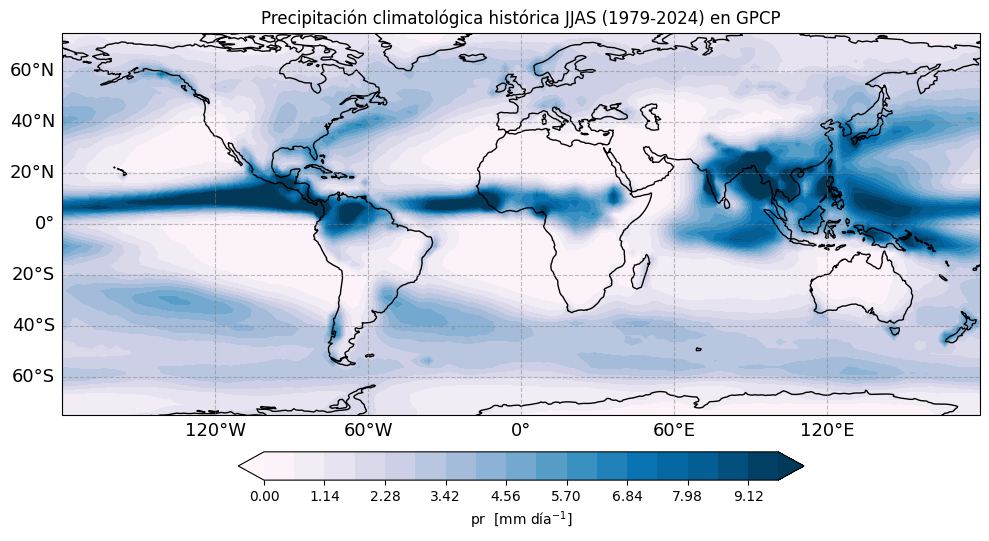

In [16]:
mapa_MC(mean_years,np.arange(0,10,0.57),'PuBu','Precipitación climatológica histórica JJAS (1979-2024) en GPCP')

In [17]:
mean_years.lon

<xarray.DataArray 'lon' (lon: 144)> Size: 576B
array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75,
        91.25,  93.75,  96.25,  98.75, 101.25, 103.75, 106.25, 108.75, 111.25,
       113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75, 131.25, 133.75,
       136.25, 138.75, 141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25,
       158.75, 161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75, 201.25,
       203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75, 221.25, 223.75,
       226.25, 228.75, 231.25, 233.75, 236.25, 238.75, 241.25, 243.75, 246.25,
       248.75, 251.25, 253.75, 256.25, 258.75, 261.25, 263.75, 266.25, 268.75,
       271.25, 273.75, 276.25, 278.75, 281.25, 283.75, 286.25, 288.75, 291.25,
       293.75, 296.25, 298.75, 301.25, 303.75, 306.25, 308.75, 311.25, 313.75,
       316.25, 318.75, 321.25, 323.75, 326.25, 328.75, 331.25, 333.75, 336.25,
       338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75, 356.25, 358.75],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    units:          degrees_east
    long_name:      Longitude
    actual_range:   [  1.25 358.75]
    standard_name:  longitude
    axis:           X

In [18]:
# Seleccionamos el área específica 
#area = mean_years.sel(lat=slice(13.75, 23.75))
#arealon = area.sel(lon=slice(253.75, 271.25))
area = mean_years.sel(lat=slice(8.75, 33.75))
arealon = area.sel(lon=slice(240.75, 276.25))
# Guardar los datos seleccionados JJAS en un archivo NetCDF
#arealon.to_netcdf('GPCP_ClimJJAS_actualizado.nc')

In [19]:
mean_years.lon

<xarray.DataArray 'lon' (lon: 144)> Size: 576B
array([  1.25,   3.75,   6.25,   8.75,  11.25,  13.75,  16.25,  18.75,  21.25,
        23.75,  26.25,  28.75,  31.25,  33.75,  36.25,  38.75,  41.25,  43.75,
        46.25,  48.75,  51.25,  53.75,  56.25,  58.75,  61.25,  63.75,  66.25,
        68.75,  71.25,  73.75,  76.25,  78.75,  81.25,  83.75,  86.25,  88.75,
        91.25,  93.75,  96.25,  98.75, 101.25, 103.75, 106.25, 108.75, 111.25,
       113.75, 116.25, 118.75, 121.25, 123.75, 126.25, 128.75, 131.25, 133.75,
       136.25, 138.75, 141.25, 143.75, 146.25, 148.75, 151.25, 153.75, 156.25,
       158.75, 161.25, 163.75, 166.25, 168.75, 171.25, 173.75, 176.25, 178.75,
       181.25, 183.75, 186.25, 188.75, 191.25, 193.75, 196.25, 198.75, 201.25,
       203.75, 206.25, 208.75, 211.25, 213.75, 216.25, 218.75, 221.25, 223.75,
       226.25, 228.75, 231.25, 233.75, 236.25, 238.75, 241.25, 243.75, 246.25,
       248.75, 251.25, 253.75, 256.25, 258.75, 261.25, 263.75, 266.25, 268.75,
       271.25, 273.75, 276.25, 278.75, 281.25, 283.75, 286.25, 288.75, 291.25,
       293.75, 296.25, 298.75, 301.25, 303.75, 306.25, 308.75, 311.25, 313.75,
       316.25, 318.75, 321.25, 323.75, 326.25, 328.75, 331.25, 333.75, 336.25,
       338.75, 341.25, 343.75, 346.25, 348.75, 351.25, 353.75, 356.25, 358.75],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 576B 1.25 3.75 6.25 8.75 ... 351.2 353.8 356.2 358.8
Attributes:
    units:          degrees_east
    long_name:      Longitude
    actual_range:   [  1.25 358.75]
    standard_name:  longitude
    axis:           X

In [20]:
# La siguiente es la función modificada para poder insertar manualmente las coordenadas al llamarla para graficar
def mapa_MC(data, levels, ccmap, titulo, extend='both', cbarlabel='pr  [mm día$^{-1}$]', 
            limite_NS=75, lon_min=None, lon_max=None, lat_min=None, lat_max=None):
    lons, lats = data.lon, data.lat
    data, lon = add_cyclic_point(data, coord=lons)
    fig = plt.figure(figsize=(12, 9))
    ax = plt.axes(projection=ccrs.PlateCarree())
    ax.coastlines()
    # plot extend con max y no both
    cs = ax.contourf(lon, lats, data, levels=levels, cmap=ccmap, extend=extend, transform=ccrs.PlateCarree())

    if lon_min is not None and lon_max is not None and lat_min is not None and lat_max is not None:
        ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
    else:
        ax.set_extent([0, 359.1, -limite_NS, limite_NS], crs=ccrs.PlateCarree())

    gl = ax.gridlines(draw_labels=True, color='gray', alpha=0.5, linestyle='--')
    ax.add_feature(cfeature.STATES.with_scale('10m'), edgecolor='k', linewidth=0.5)
    gl.top_labels = gl.right_labels = False
    gl.xlabel_style = {'size': 13}
    gl.ylabel_style = {'size': 13}
    plt.title(titulo, fontsize=19)
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.1)
    # agregar colorbar
    cbar = plt.colorbar(cs, orientation='horizontal', fraction=0.046, pad=0.06)
    cbar.ax.set_xlabel(cbarlabel)

In [21]:
print(np.nanmin(arealon), np.nanmax(arealon))

0.093731135 13.499194


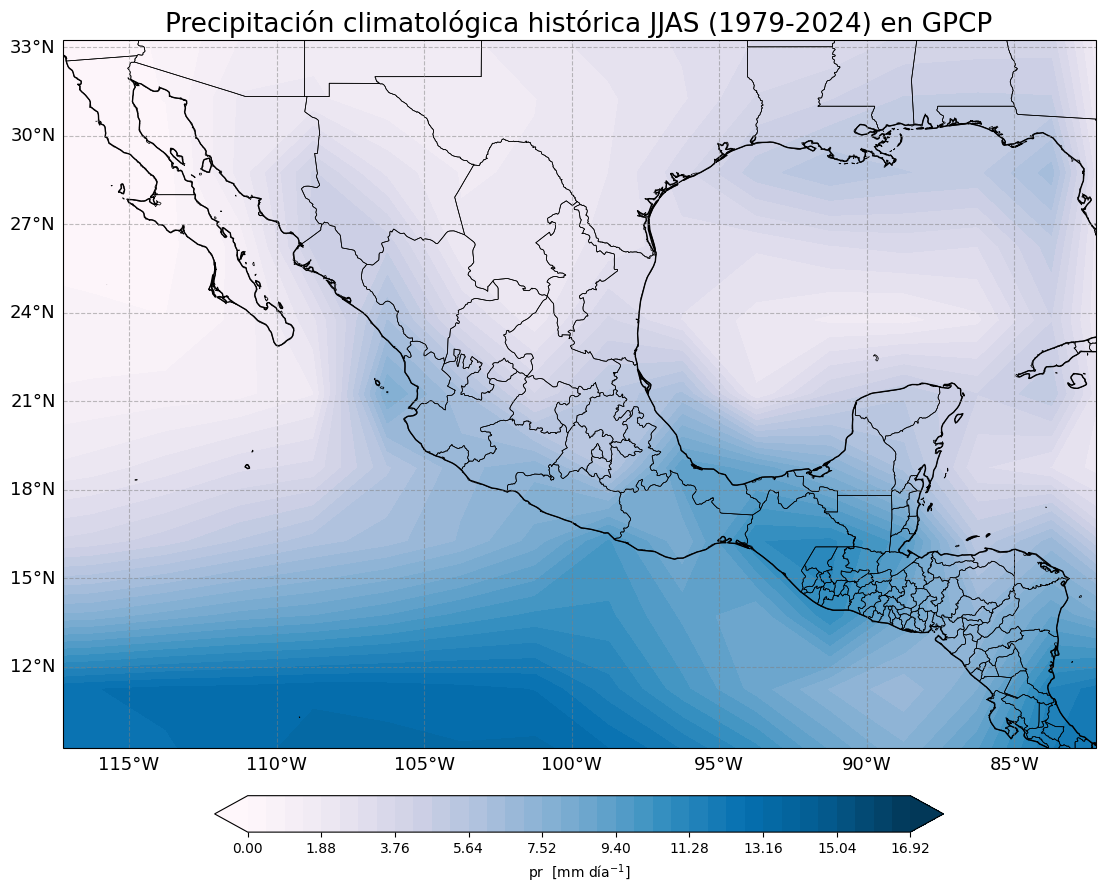

In [22]:
mapa_MC(arealon, np.arange(0,17,0.47), 'PuBu', 'Precipitación climatológica histórica JJAS (1979-2024) en GPCP', 
        lon_min=242.75, lon_max=277.75, lat_min=9.25, lat_max=33.25)